# Installation, data loading, and imports

In [1]:
!pisces_setup

Converting Mads Olsen model to Keras...
Model saved at /Users/eric/Engineering/Work/pisces/pisces/cached_models/mo_resunet.keras


# Triplots

In [2]:
from analyses.NHRC.nhrc_utils.analysis import load_evaluation_df


evaluations_df = load_evaluation_df()


LR_KERNEL_SIZE: 61


In [3]:
evaluations_df.head(10)

,AUROC,TST_Error,WASA,threshold,sleep_accuracy,test_id,scenario,model
0,0.759167,-16.0,0.453237,0.718240,93,1066528,stationary,lr
1,0.759167,-27.5,0.381295,0.674833,95,1066528,stationary,lr
2,0.759167,-48.5,0.165468,0.583849,97,1066528,stationary,lr
3,0.814754,-15.5,0.460432,0.267328,93,1066528,stationary,finetuning
4,0.814754,-30.5,0.345324,0.118729,95,1066528,stationary,finetuning
5,0.814754,-45.5,0.215827,0.042079,97,1066528,stationary,finetuning
6,0.719518,-23.5,0.345324,0.361121,93,1066528,stationary,naive
7,0.719518,-36.0,0.258993,0.294006,95,1066528,stationary,naive
8,0.719518,-47.5,0.179856,0.219877,97,1066528,stationary,naive
9,0.666178,-21.0,0.381295,0.776124,93,1066528,hybrid,lr


In [12]:
WASA_SLEEP_PERCENT = 95
STATIONARY_SET_NAME = "Stationary Data"
HYBRID_SET_NAME = "Hybrid Data"
SECOND_LINE = f"Sleep Accuracy ≈ {WASA_SLEEP_PERCENT}%"
SECOND_TITLE_LINE = f"Comparison of Stationary and Hybrid Data Metrics, {SECOND_LINE}"
TRIPLOT_DPI = 600

## Tri plot for UNet

/Users/eric/Engineering/Work/pisces/analyses/NHRC/nhrc_utils/plotting.py:79: UserWarning: Glyph 10229 (\N{LONG LEFTWARDS ARROW}) missing from current font.
  fig.tight_layout()
/Users/eric/Engineering/Work/pisces/analyses/NHRC/nhrc_utils/plotting.py:79: UserWarning: Glyph 10230 (\N{LONG RIGHTWARDS ARROW}) missing from current font.
  fig.tight_layout()
/var/folders/h4/pg7xmblx74zbp2yhls4bc_mh0000gn/T/ipykernel_51533/2058586102.py:29: UserWarning: Glyph 10229 (\N{LONG LEFTWARDS ARROW}) missing from current font.
  fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{EXTRA_LOWER}_triplot_{WASA_SLEEP_PERCENT}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')
/var/folders/h4/pg7xmblx74zbp2yhls4bc_mh0000gn/T/ipykernel_51533/2058586102.py:29: UserWarning: Glyph 10230 (\N{LONG RIGHTWARDS ARROW}) missing from current font.
  fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{EXTRA_LOWER}_triplot_{WASA_SLEEP_PERCENT}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')
/opt/homebrew/Caskroom/miniforge/base/envs/pisce

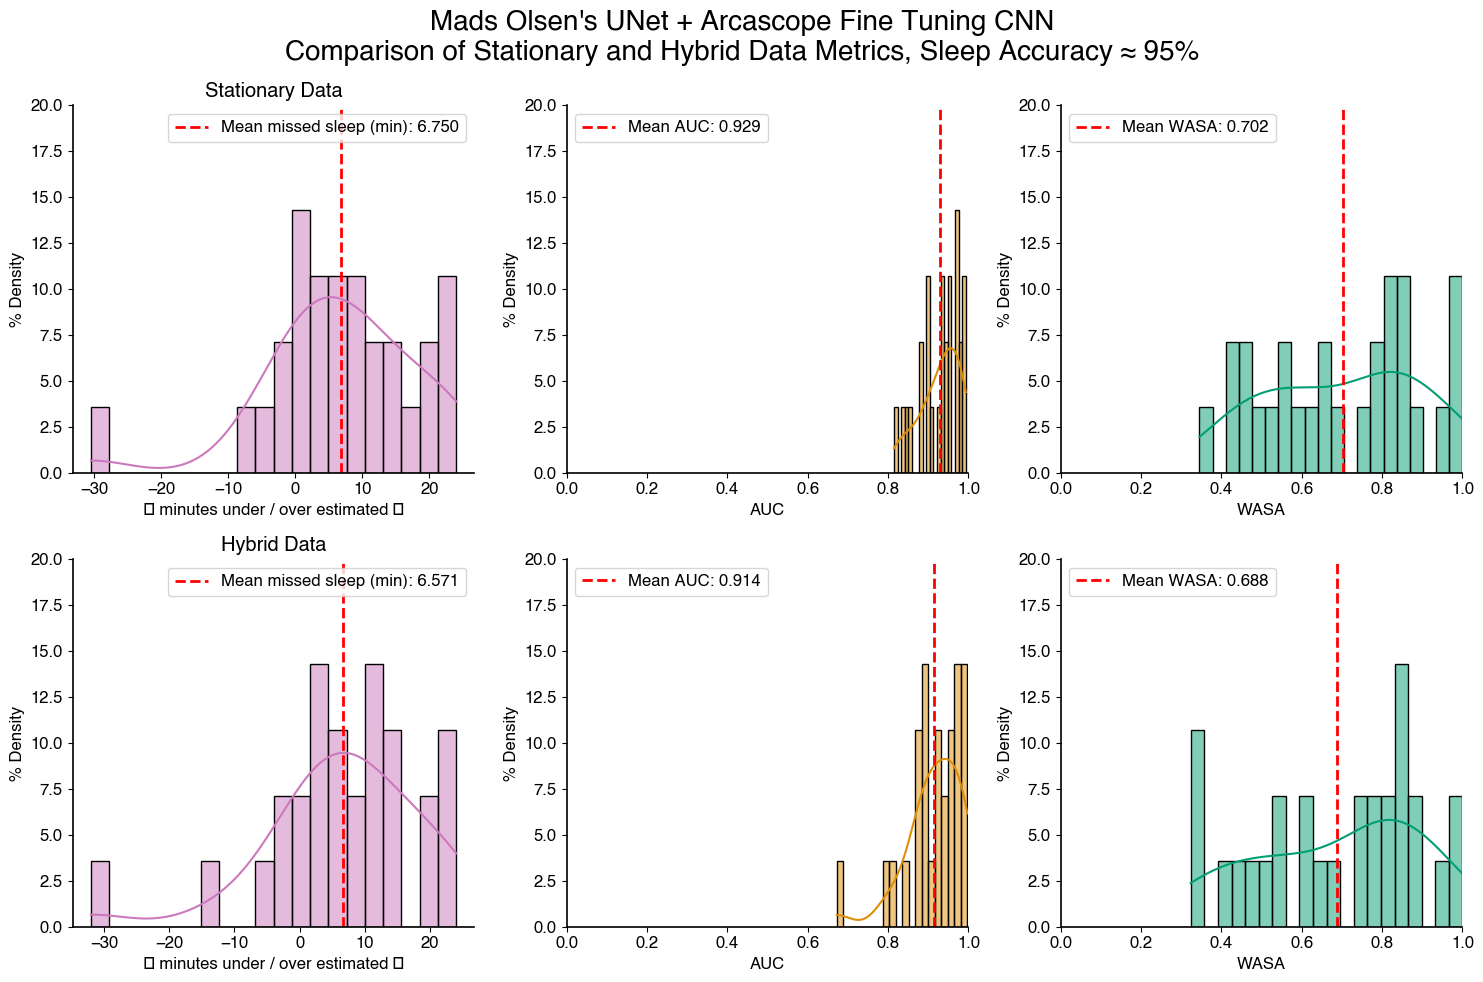

In [13]:
from analyses.NHRC.nhrc_utils.analysis import DEFAULT_EVALUATION_DIR, SCENARIOS, STATIONARY_LOWER, HYBRID_LOWER
import matplotlib.pyplot as plt
from analyses.NHRC.nhrc_utils.analysis import ACCURACY_COLUMN, AUROC_COLUMN, MODEL_COLUMN, SCENARIO_COLUMN, SLEEP_ACCURACY_COLUMN, WASA_COLUMN
from analyses.NHRC.nhrc_utils.plotting import tri_plot_metrics
from analyses.NHRC.nhrc_utils.model_definitions import EXTRA_LAYERS_NAME, EXTRA_LOWER, LR_LOWER, NAIVE_LOWER




fig, axs = plt.subplots(2, 3, figsize=(15, 10))

cnn_evaluations_df = evaluations_df[evaluations_df[MODEL_COLUMN] == EXTRA_LOWER]
cnn_evaluations_df = cnn_evaluations_df[cnn_evaluations_df[SLEEP_ACCURACY_COLUMN] == WASA_SLEEP_PERCENT]
cnn_stationary = cnn_evaluations_df[cnn_evaluations_df[SCENARIO_COLUMN] == STATIONARY_LOWER]
cnn_hybrid = cnn_evaluations_df[cnn_evaluations_df[SCENARIO_COLUMN] == HYBRID_LOWER]

for ax in axs.flatten():
    ax.set_ylim(0, 20)

tri_plot_metrics(evaluations_df=cnn_stationary, axs=axs[0], axs_set_name=STATIONARY_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)
tri_plot_metrics(cnn_hybrid, axs=axs[1], axs_set_name=HYBRID_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)


fig.suptitle(f"Mads Olsen's UNet + Arcascope {EXTRA_LAYERS_NAME} CNN\n{SECOND_TITLE_LINE}", fontsize=20)

fig.tight_layout()
fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{EXTRA_LOWER}_triplot_{WASA_SLEEP_PERCENT}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')

/Users/eric/Engineering/Work/pisces/analyses/NHRC/nhrc_utils/plotting.py:79: UserWarning: Glyph 10229 (\N{LONG LEFTWARDS ARROW}) missing from current font.
  fig.tight_layout()
/Users/eric/Engineering/Work/pisces/analyses/NHRC/nhrc_utils/plotting.py:79: UserWarning: Glyph 10230 (\N{LONG RIGHTWARDS ARROW}) missing from current font.
  fig.tight_layout()
/var/folders/h4/pg7xmblx74zbp2yhls4bc_mh0000gn/T/ipykernel_51533/1387949431.py:18: UserWarning: Glyph 10229 (\N{LONG LEFTWARDS ARROW}) missing from current font.
  fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{NAIVE_LOWER}_triplot_{WASA_SLEEP_PERCENT}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')
/var/folders/h4/pg7xmblx74zbp2yhls4bc_mh0000gn/T/ipykernel_51533/1387949431.py:18: UserWarning: Glyph 10230 (\N{LONG RIGHTWARDS ARROW}) missing from current font.
  fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{NAIVE_LOWER}_triplot_{WASA_SLEEP_PERCENT}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')
/opt/homebrew/Caskroom/miniforge/base/envs/pisce

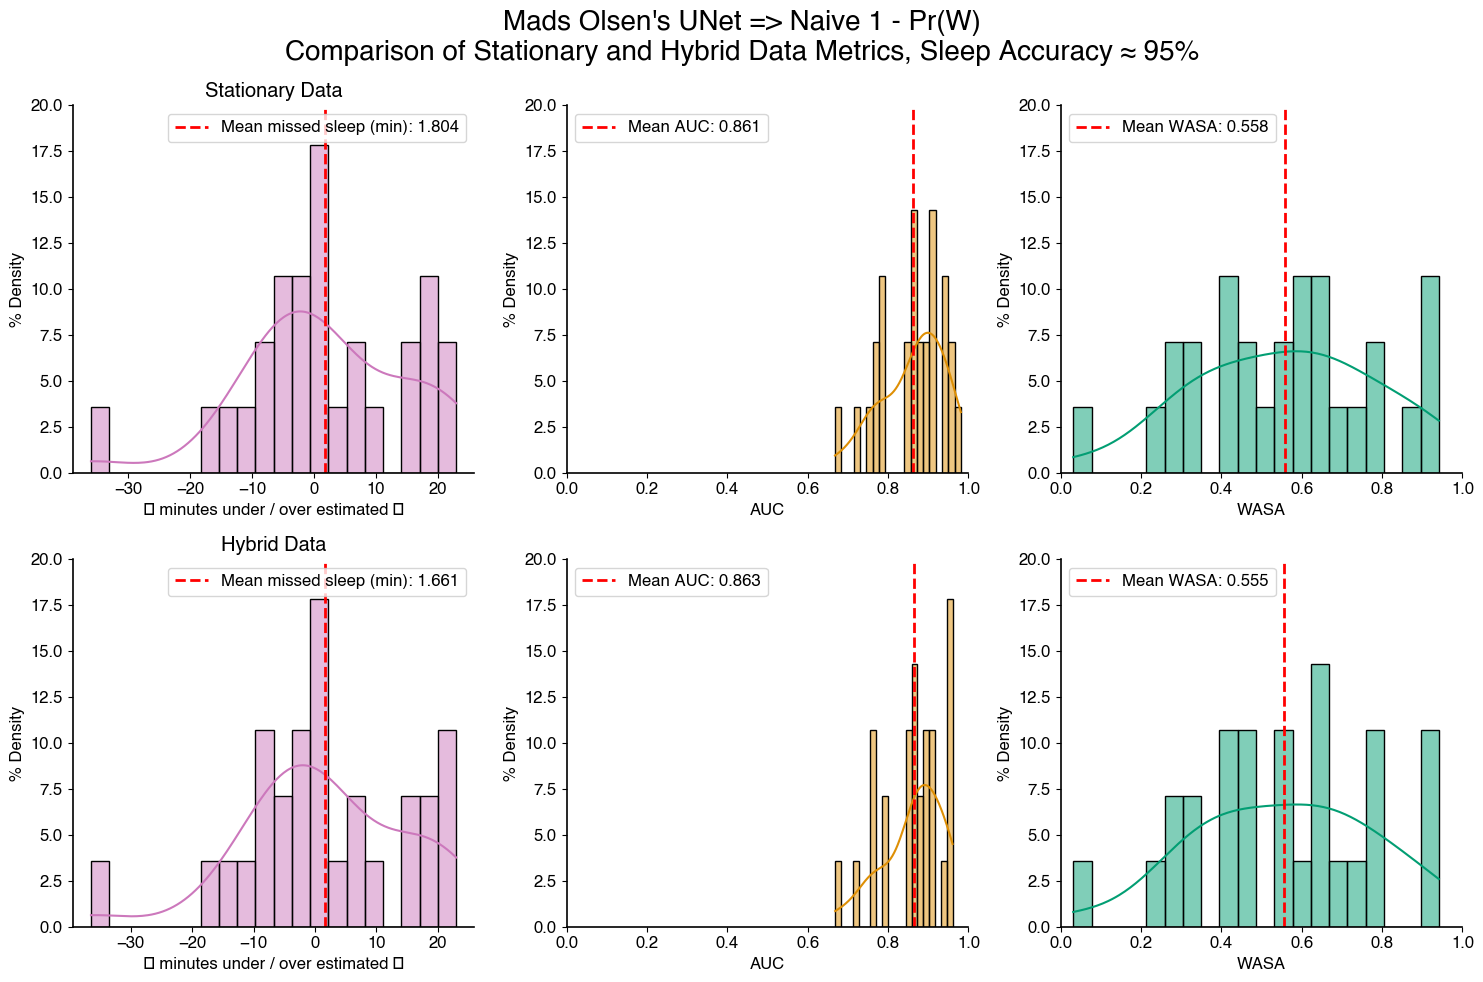

In [14]:


fig, axs = plt.subplots(2, 3, figsize=(15, 10))

naive_evaluations_df = evaluations_df[evaluations_df[MODEL_COLUMN] == NAIVE_LOWER]
naive_evaluations_df = naive_evaluations_df[naive_evaluations_df[SLEEP_ACCURACY_COLUMN] == WASA_SLEEP_PERCENT]
naive_stationary = naive_evaluations_df[naive_evaluations_df[SCENARIO_COLUMN] == STATIONARY_LOWER]
naive_hybrid = naive_evaluations_df[naive_evaluations_df[SCENARIO_COLUMN] == HYBRID_LOWER]

tri_plot_metrics(naive_stationary, axs=axs[0], axs_set_name=STATIONARY_SET_NAME, 
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)
tri_plot_metrics(naive_hybrid, axs=axs[1], axs_set_name=HYBRID_SET_NAME, 
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)
for ax in axs.flatten():
    ax.set_ylim(0, 20)

fig.suptitle(f"Mads Olsen's UNet => Naive 1 - Pr(W)\n{SECOND_TITLE_LINE}", fontsize=20)

fig.tight_layout()
fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{NAIVE_LOWER}_triplot_{WASA_SLEEP_PERCENT}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')

## Tri plot for logistic regression CNN

/Users/eric/Engineering/Work/pisces/analyses/NHRC/nhrc_utils/plotting.py:79: UserWarning: Glyph 10229 (\N{LONG LEFTWARDS ARROW}) missing from current font.
  fig.tight_layout()
/Users/eric/Engineering/Work/pisces/analyses/NHRC/nhrc_utils/plotting.py:79: UserWarning: Glyph 10230 (\N{LONG RIGHTWARDS ARROW}) missing from current font.
  fig.tight_layout()
/var/folders/h4/pg7xmblx74zbp2yhls4bc_mh0000gn/T/ipykernel_51533/1293884317.py:19: UserWarning: Glyph 10229 (\N{LONG LEFTWARDS ARROW}) missing from current font.
  fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{LR_LOWER}_triplot_{WASA_SLEEP_PERCENT}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')
/var/folders/h4/pg7xmblx74zbp2yhls4bc_mh0000gn/T/ipykernel_51533/1293884317.py:19: UserWarning: Glyph 10230 (\N{LONG RIGHTWARDS ARROW}) missing from current font.
  fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{LR_LOWER}_triplot_{WASA_SLEEP_PERCENT}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')
/opt/homebrew/Caskroom/miniforge/base/envs/pisces/lib/

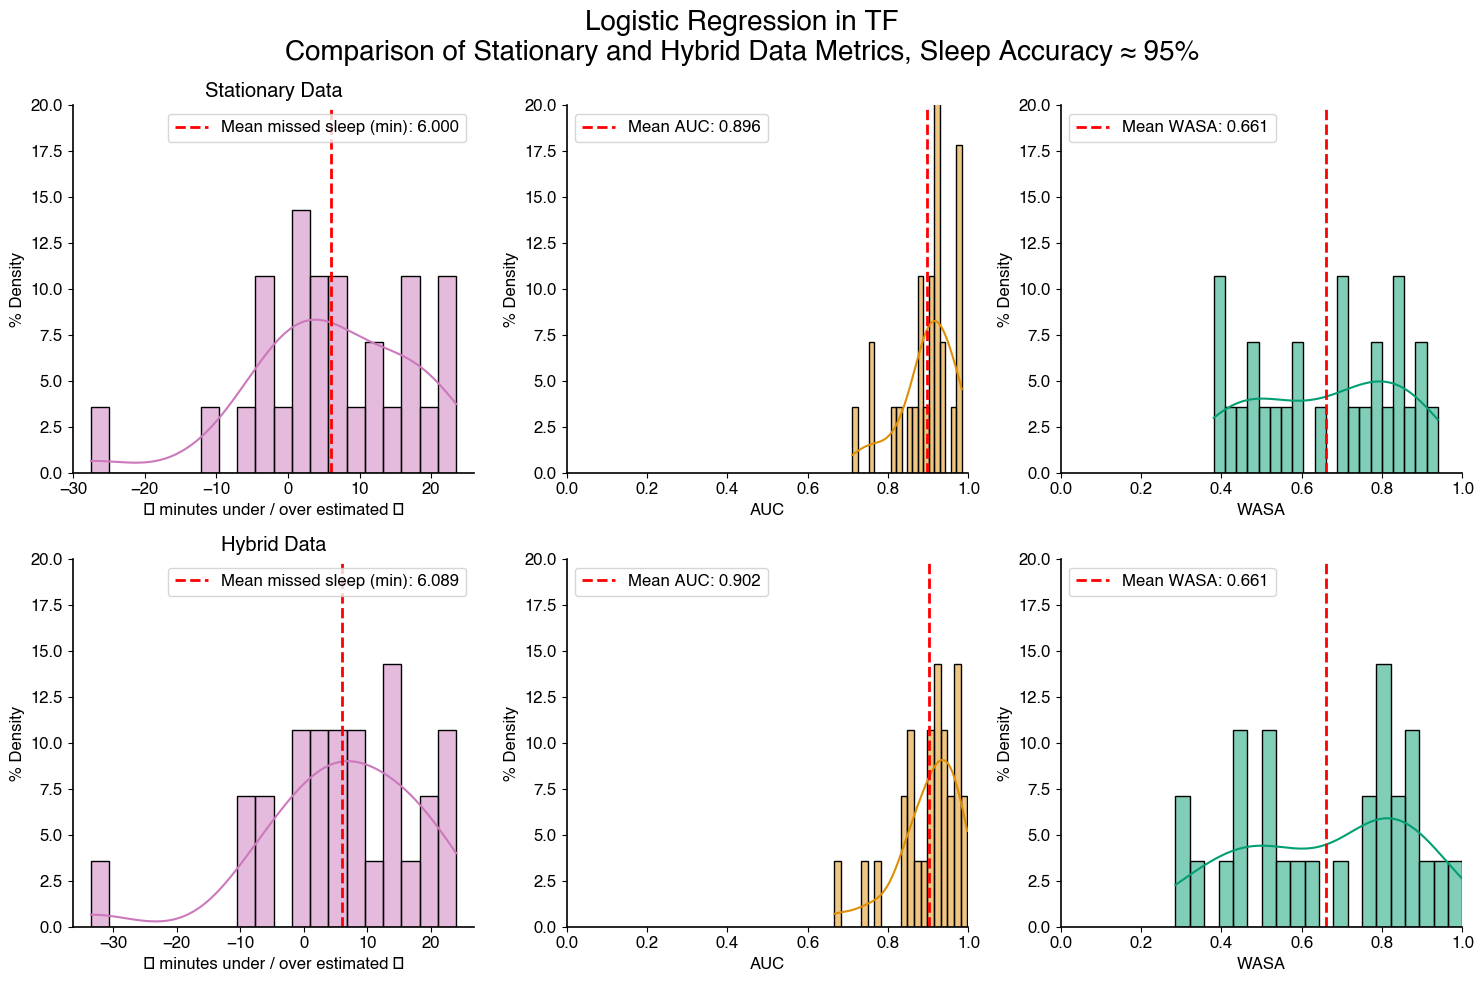

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

lr_evaluations_df = evaluations_df[evaluations_df[MODEL_COLUMN] == LR_LOWER]
lr_evaluations_df = lr_evaluations_df[lr_evaluations_df[SLEEP_ACCURACY_COLUMN] == WASA_SLEEP_PERCENT]
lr_stationary = lr_evaluations_df[lr_evaluations_df[SCENARIO_COLUMN] == STATIONARY_LOWER]
lr_hybrid = lr_evaluations_df[lr_evaluations_df[SCENARIO_COLUMN] == HYBRID_LOWER]

tri_plot_metrics(lr_stationary, axs=axs[0], axs_set_name=STATIONARY_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)
tri_plot_metrics(lr_hybrid, axs=axs[1], axs_set_name=HYBRID_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)

for ax in axs.flatten():
    ax.set_ylim(0, 20)

fig.suptitle(f"Logistic Regression in TF\n{SECOND_TITLE_LINE}", fontsize=20)

fig.tight_layout()
fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{LR_LOWER}_triplot_{WASA_SLEEP_PERCENT}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')

# Investigate very negative TST Error

In [16]:
evaluations_df.head()

,AUROC,TST_Error,WASA,threshold,sleep_accuracy,test_id,scenario,model
0,0.759167,-16.0,0.453237,0.718240,93,1066528,stationary,lr
1,0.759167,-27.5,0.381295,0.674833,95,1066528,stationary,lr
2,0.759167,-48.5,0.165468,0.583849,97,1066528,stationary,lr
3,0.814754,-15.5,0.460432,0.267328,93,1066528,stationary,finetuning
4,0.814754,-30.5,0.345324,0.118729,95,1066528,stationary,finetuning


In [9]:
evaluations_df_sorted = evaluations_df[evaluations_df[MODEL_COLUMN] == LR_LOWER].sort_values(by = ACCURACY_COLUMN, ascending = False)
evaluations_df_sorted.head()

,AUROC,TST_Error,WASA,threshold,sleep_accuracy,test_id,scenario,model
299,0.898559,451.0,1.00,0.875000,97,6220552,hybrid,lr
72,0.980696,33.0,0.90,0.682539,93,1818471,stationary,lr
81,0.997152,33.0,1.00,0.736064,93,1818471,hybrid,lr
153,0.943280,31.0,0.88,0.755733,93,3997827,hybrid,lr
144,0.925145,30.5,0.84,0.730425,93,3997827,stationary,lr


In [10]:
from pathlib import Path
import numpy as np
from analyses.NHRC.nhrc_utils.analysis import load_model, prepare_data

from analyses.NHRC.nhrc_utils.model_definitions import cnn_pred_proba, lr_cnn_pred_proba
from analyses.NHRC.nhrc_utils.plotting import ranked_debug_plots

walch_preprocessed_data = np.load('./pre_processed_data/walch/walch_preprocessed_data.npy',
                                   allow_pickle=True).item()
walch_keys = list(walch_preprocessed_data.keys())
walch_data_bundle = prepare_data(walch_preprocessed_data)

cnn_predictors = [
    load_model(k, EXTRA_LOWER) for k in walch_keys
]

lr_predictors = [
    load_model(k, LR_LOWER) for k in walch_keys
]

scene = STATIONARY_LOWER
model_t = LR_LOWER
df_sel = evaluations_df[
    (evaluations_df[SCENARIO_COLUMN] == scene)
    & (evaluations_df[MODEL_COLUMN] == model_t)
    ]
df_sel.reset_index(drop=True, inplace=True)
data_bundle = walch_data_bundle



predictor_dict = {
    EXTRA_LOWER: cnn_predictors,
    LR_LOWER: lr_predictors
}

eval_data_dict = {
    EXTRA_LOWER: data_bundle.mo_predictions,
    LR_LOWER: data_bundle.activity
}

evaluator_dict = {
    EXTRA_LOWER: cnn_pred_proba,
    LR_LOWER: lr_cnn_pred_proba
}

# ranked_debug_plots(
#     df_sel,
#     eval_data_dict[model_t].numpy(),
#     data_bundle.true_labels.numpy(),
#     predictor_dict[model_t],
#     evaluator_dict[model_t],
#     data_bundle.spectrogram.numpy(),
#     f"_tst_eval_{scene}_{model_t}",
#     model_t,
#     walch_keys,
#     sortby=ACCURACY_COLUMN,
#     saveto=Path("./debug_plots"),
#     sort_ascending=False
# )

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


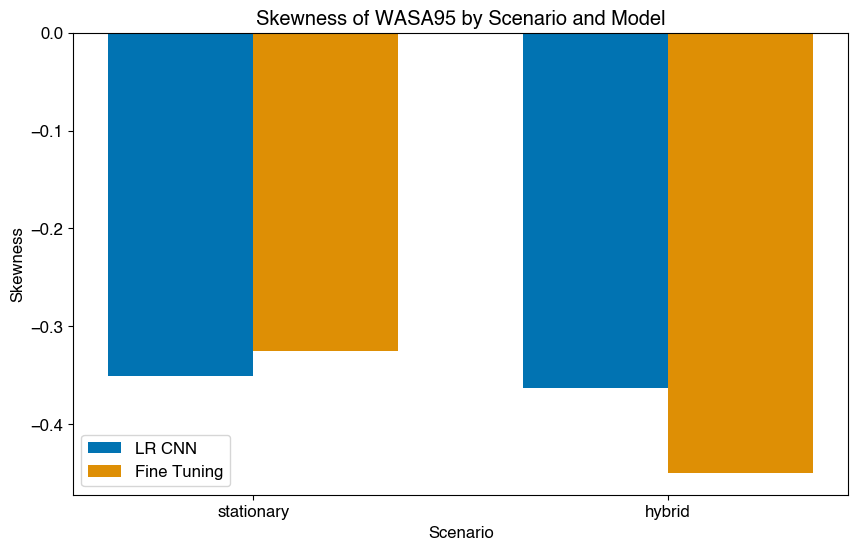

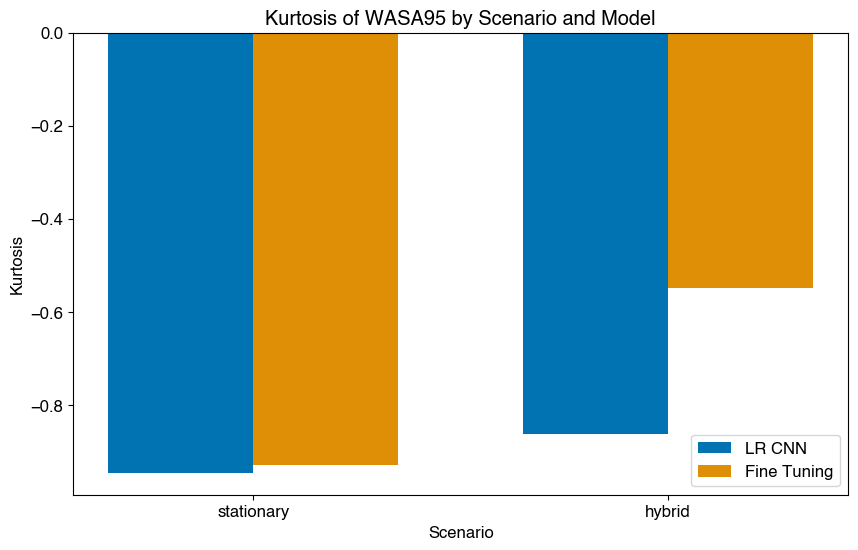

In [11]:
import seaborn as sns
from analyses.NHRC.nhrc_utils.model_definitions import LR_CNN_NAME, MODEL_TYPES
from analyses.NHRC.nhrc_utils.plotting import COLOR_PALETTE
from scipy.stats import skew, kurtosis
import numpy as np

import matplotlib.pyplot as plt

model_types = MODEL_TYPES
scenarios = SCENARIOS

finetuning = evaluations_df[evaluations_df[MODEL_COLUMN] == EXTRA_LOWER]
lr = evaluations_df[evaluations_df[MODEL_COLUMN] == LR_LOWER]
finetuning_wasas = finetuning[WASA_COLUMN]
finetuning_wasas_stationary = finetuning_wasas[finetuning[SCENARIO_COLUMN] == STATIONARY_LOWER]
finetuning_wasas_hybrid = finetuning_wasas[finetuning[SCENARIO_COLUMN] == HYBRID_LOWER]

lr_wasas = lr[WASA_COLUMN]
lr_wasas_stationary = lr_wasas[lr[SCENARIO_COLUMN] == STATIONARY_LOWER]
lr_wasas_hybrid = lr_wasas[lr[SCENARIO_COLUMN] == HYBRID_LOWER]

SKEW_LOWER = "skew"
KURT_LOWER = "kurtosis"

sk_dict = {
    SKEW_LOWER: {m: {} for m in model_types},
    KURT_LOWER: {m: {} for m in model_types}
}

for scenario in scenarios:
    for model in model_types:
        for stat in [SKEW_LOWER, KURT_LOWER]:
            stat_fn = eval(stat)
            sk_dict[stat][model][scenario] = stat_fn(
                evaluations_df[
                    (evaluations_df[MODEL_COLUMN] == model) 
                    & (evaluations_df[SCENARIO_COLUMN] == scenario)
                ][WASA_COLUMN]
            )
# Calculate skew and kurtosis for each dataframe
skew_wasa = sk_dict[SKEW_LOWER]

kurtosis_wasa = sk_dict[KURT_LOWER]

# Set up data for plotting
# scenarios = list(skew_wasa['lr'].keys())
# models = list(skew_wasa.keys())
skew_values = [[skew_wasa[model][scenario] for scenario in scenarios] for model in model_types]
kurtosis_values = [[kurtosis_wasa[model][scenario] for scenario in scenarios] for model in model_types]

# Define x-axis positions for side-by-side bars
x = np.arange(len(scenarios))
width = 0.35

lr_color = COLOR_PALETTE[0]
finetuning_color = COLOR_PALETTE[1]

# Plot Skewness

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, skew_values[0], width, label=LR_CNN_NAME, color=lr_color)
plt.bar(x + width/2, skew_values[1], width, label=EXTRA_LAYERS_NAME, color=finetuning_color)
plt.xlabel('Scenario')
plt.ylabel('Skewness')
plt.title(f'Skewness of WASA{WASA_SLEEP_PERCENT} by Scenario and Model')
plt.xticks(x, scenarios)
plt.legend()
plt.show()

# Plot Kurtosis
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, kurtosis_values[0], width, label=LR_CNN_NAME, color=lr_color)
plt.bar(x + width/2, kurtosis_values[1], width, label=EXTRA_LAYERS_NAME, color=finetuning_color)
plt.xlabel('Scenario')
plt.ylabel('Kurtosis')
plt.title(f'Kurtosis of WASA{WASA_SLEEP_PERCENT} by Scenario and Model')
plt.xticks(x, scenarios)
plt.legend()
plt.show()
